# Big_Data_Sales_Prediction Project



Name: Vaibhav Tayade

contact details:

8087970061
vaibhav_t29@rediffmail.com

# Importing Libraries

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Importing csv files

In [113]:
train_data = pd.read_csv('big_data_train.csv')

test_data = pd.read_csv('big_data_test.csv')

In [114]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [115]:
test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [116]:
train_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [117]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Observations:
    from the above description of data, we can see that nominal skewness and present in columns like Item_Weight, Item_Visibility.

In [118]:
#checking for null values:

train_data.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Observations:
    
    There are null values present in columns like Item_Weight, and Outlet_Size

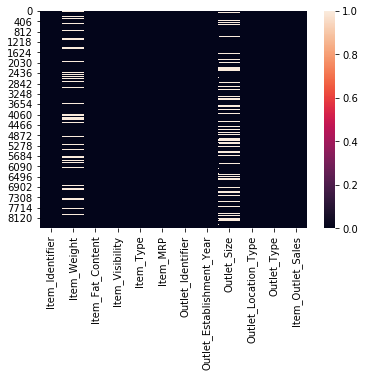

In [119]:
#checking null values with the help of heatmap plot

sns.heatmap(train_data.isnull())

Observations:

We can see there are null values in 'Item_Weight' and 'Outlet_Size' column

In [120]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Observations:
    
    There are miss spelling and multiple names for same categorical data, which will create problem while making model.
    We need to create one category for same categorical miss spells, like 'Low Fat' for Low fat and LF types and Regular for reg types

In [121]:
#replacing spell mistakes and organizing proper categories:

train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

checking for various categories in the columns:

In [122]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [123]:
train_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [124]:
train_data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [125]:
train_data['Outlet_Size'].unique()


array(['Medium', nan, 'High', 'Small'], dtype=object)

In [126]:
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [127]:
train_data['Outlet_Size'].mode()


0    Medium
dtype: object

Observations:
    
    We can see that there are null values in the Outlet_Size, we can deal with this by replacing null values with the mode values, as these are categorical data.

In [128]:
# replacing missing values in the Outlet_Size column by mode value:

big_data_sales = [train_data, test_data]

for data in big_data_sales:
    data['Outlet_Size'].fillna('Medium', inplace=True)

In [129]:
train_data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [130]:
# dealing with the missing values of 'Item_Weight'
# replacing missing values with the mean values:
big_data_sales = [train_data, test_data]

for data in big_data_sales:
    data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [131]:
# again confirming weather the null values been replaced or not.
train_data['Item_Weight'].isnull().sum()

0

In [132]:
train_data['Outlet_Location_Type'].unique()


array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [133]:
train_data['Outlet_Type'].unique()


array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

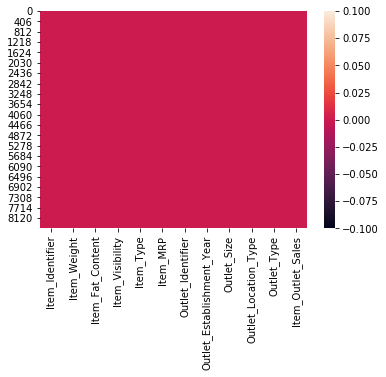

In [134]:
sns.heatmap(train_data.isnull())

observations:

Now we can see that there are no null values in the dataset.

# Checking Skewness

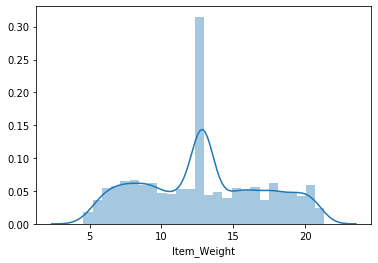

In [135]:
sns.distplot(train_data['Item_Weight'])

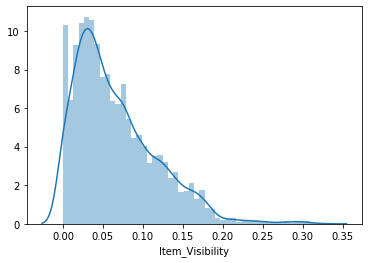

In [136]:
sns.distplot(train_data['Item_Visibility'])

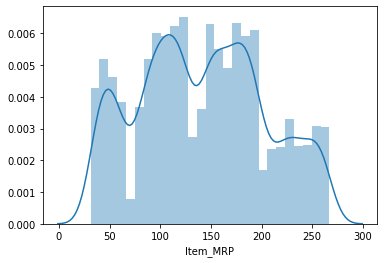

In [137]:
sns.distplot(train_data['Item_MRP'])

Observations:
    
    from the above dist plots we can say there are skewness present in the dataset, in columns like Item_Weight and Item_Visibility.

# Checking Outliers:

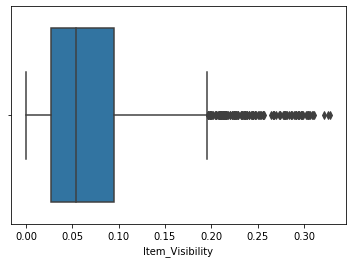

In [138]:
sns.boxplot(train_data['Item_Visibility'])

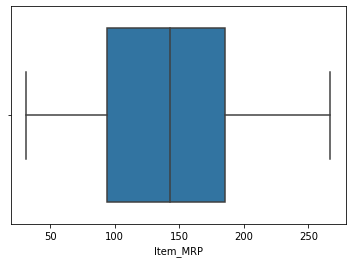

In [139]:
sns.boxplot(train_data['Item_MRP'])

Observations:
    
    we can say there are outliers present in Item_Visibility column.
    

In [140]:
# Dealing with the 'Outlet_Establishment_Year' column, as year of establishment is given, we need to convert into relevant information by converting it into number of years old it is with respect to 2013 datasets.

train_data['num_years'] = train_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 
test_data['num_years'] = test_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x)

In [141]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,num_years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


# Dropping Irrelevant columns

In [142]:
train_data = train_data.drop(['Outlet_Establishment_Year'], axis=1)

In [143]:
test_data = test_data.drop(['Outlet_Establishment_Year'], axis=1)

In [144]:
#train_data = train_data.drop(['Item_Identifier'], axis=1)
#test_data = test_data.drop(['Item_Identifier'], axis=1)

In [145]:
train_data['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCL31     9
NCB18     9
NCF42     9
         ..
FDQ60     1
FDO33     1
FDC23     1
FDY43     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [146]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,num_years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26


In [147]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,num_years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,14
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,6
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store,15
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,6
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,28


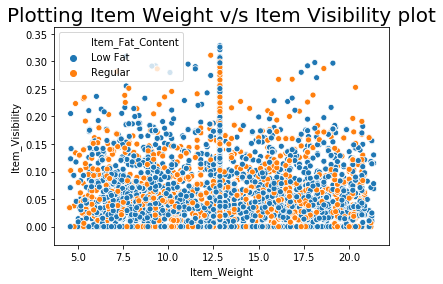

In [148]:
plt.title('Plotting Item Weight v/s Item Visibility plot', fontsize = 20)

sns.scatterplot(train_data['Item_Weight'], train_data['Item_Visibility'], hue=train_data['Item_Fat_Content'])

Observation:
    We can say for sure that data is very well heterogenous in nature.
    No particular pattern can be seen a dataset.

# Label Ecoding the categorical data

In [149]:
# as we can see that there are few categorical data in few columns, which we need to convert them to nuemerical data, which can be done with the help of label encoder.



LE = LabelEncoder()

big_data_sales = [train_data, test_data]

for data in big_data_sales:
    data['Item_Fat_Content'] = LE.fit_transform(data['Item_Fat_Content'])
    data['Item_Type'] = LE.fit_transform(data['Item_Type'])
    data['Outlet_Size'] = LE.fit_transform(data['Outlet_Size'])
    data['Outlet_Location_Type'] = LE.fit_transform(data['Outlet_Location_Type'])
    data['Outlet_Type'] = LE.fit_transform(data['Outlet_Type'])
    data['Outlet_Identifier'] = LE.fit_transform(data['Outlet_Identifier'])
    data['Item_Identifier'] = LE.fit_transform(data['Item_Identifier'])


In [150]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,num_years
0,156,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380,14
1,8,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228,4
2,662,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700,14
3,1121,19.20,1,0.000000,6,182.0950,0,1,2,0,732.3800,15
4,1297,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052,26


In [151]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,num_years
0,1103,20.750000,0,0.007565,13,107.8622,9,1,0,1,14
1,1067,8.300000,1,0.038428,4,87.3198,2,1,1,1,6
2,1406,14.600000,0,0.099575,11,241.7538,0,1,2,0,15
3,809,7.315000,0,0.015388,13,155.0340,2,1,1,1,6
4,1184,12.695633,1,0.118599,4,234.2300,5,1,2,3,28


In [152]:
#changing the order of the dataframe:

train_data = train_data[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP','Outlet_Identifier', 'Item_Identifier','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'num_years', 'Item_Outlet_Sales']]
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,num_years,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,9,156,1,0,1,14,3735.1380
1,5.920,1,0.019278,14,48.2692,3,8,1,2,2,4,443.4228
2,17.500,0,0.016760,10,141.6180,9,662,1,0,1,14,2097.2700
3,19.200,1,0.000000,6,182.0950,0,1121,1,2,0,15,732.3800
4,8.930,0,0.000000,9,53.8614,1,1297,0,2,1,26,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,370,0,2,1,26,2778.3834
8519,8.380,1,0.046982,0,108.1570,7,897,1,1,1,11,549.2850
8520,10.600,0,0.035186,8,85.1224,6,1357,2,1,1,9,1193.1136
8521,7.210,1,0.145221,13,103.1332,3,681,1,2,2,4,1845.5976


In [153]:
train_data.skew()

Item_Weight             0.090561
Item_Fat_Content        0.616705
Item_Visibility         1.167091
Item_Type               0.101655
Item_MRP                0.127202
Outlet_Identifier      -0.059861
Item_Identifier        -0.008877
Outlet_Size            -0.087072
Outlet_Location_Type   -0.209093
Outlet_Type             0.927438
num_years               0.396641
Item_Outlet_Sales       1.177531
dtype: float64

Observations:
    
    Skewness can be seen in the columns like Item_Visibility and Item_Outlet_Sales

In [154]:
big_data_cor = train_data.corr()
big_data_cor

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,num_years,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,0.044518,-0.007225,0.004088,-0.000566,0.008301,0.011550
Item_Fat_Content,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,-0.114660,-0.000622,-0.001598,0.002199,-0.003151,0.018719
Item_Visibility,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.025482,0.069309,-0.028099,-0.173468,0.074834,-0.128625
Item_Type,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,-0.017973,-0.001859,0.003084,0.003053,-0.004970,0.017048
Item_MRP,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.012853,0.006059,0.000232,-0.001975,-0.005020,0.567574
Outlet_Identifier,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,-0.008602,0.504603,-0.716176,0.099873,-0.079035,0.162325
Item_Identifier,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,1.000000,0.001389,0.003656,-0.001178,0.012772,0.002869
Outlet_Size,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.001389,1.000000,-0.614311,-0.201483,-0.193389,-0.086182
Outlet_Location_Type,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,0.003656,-0.614311,1.000000,0.467219,0.089216,0.089367
Outlet_Type,-0.000566,0.002199,-0.173468,0.003053,-0.001975,0.099873,-0.001178,-0.201483,0.467219,1.000000,0.122304,0.401522


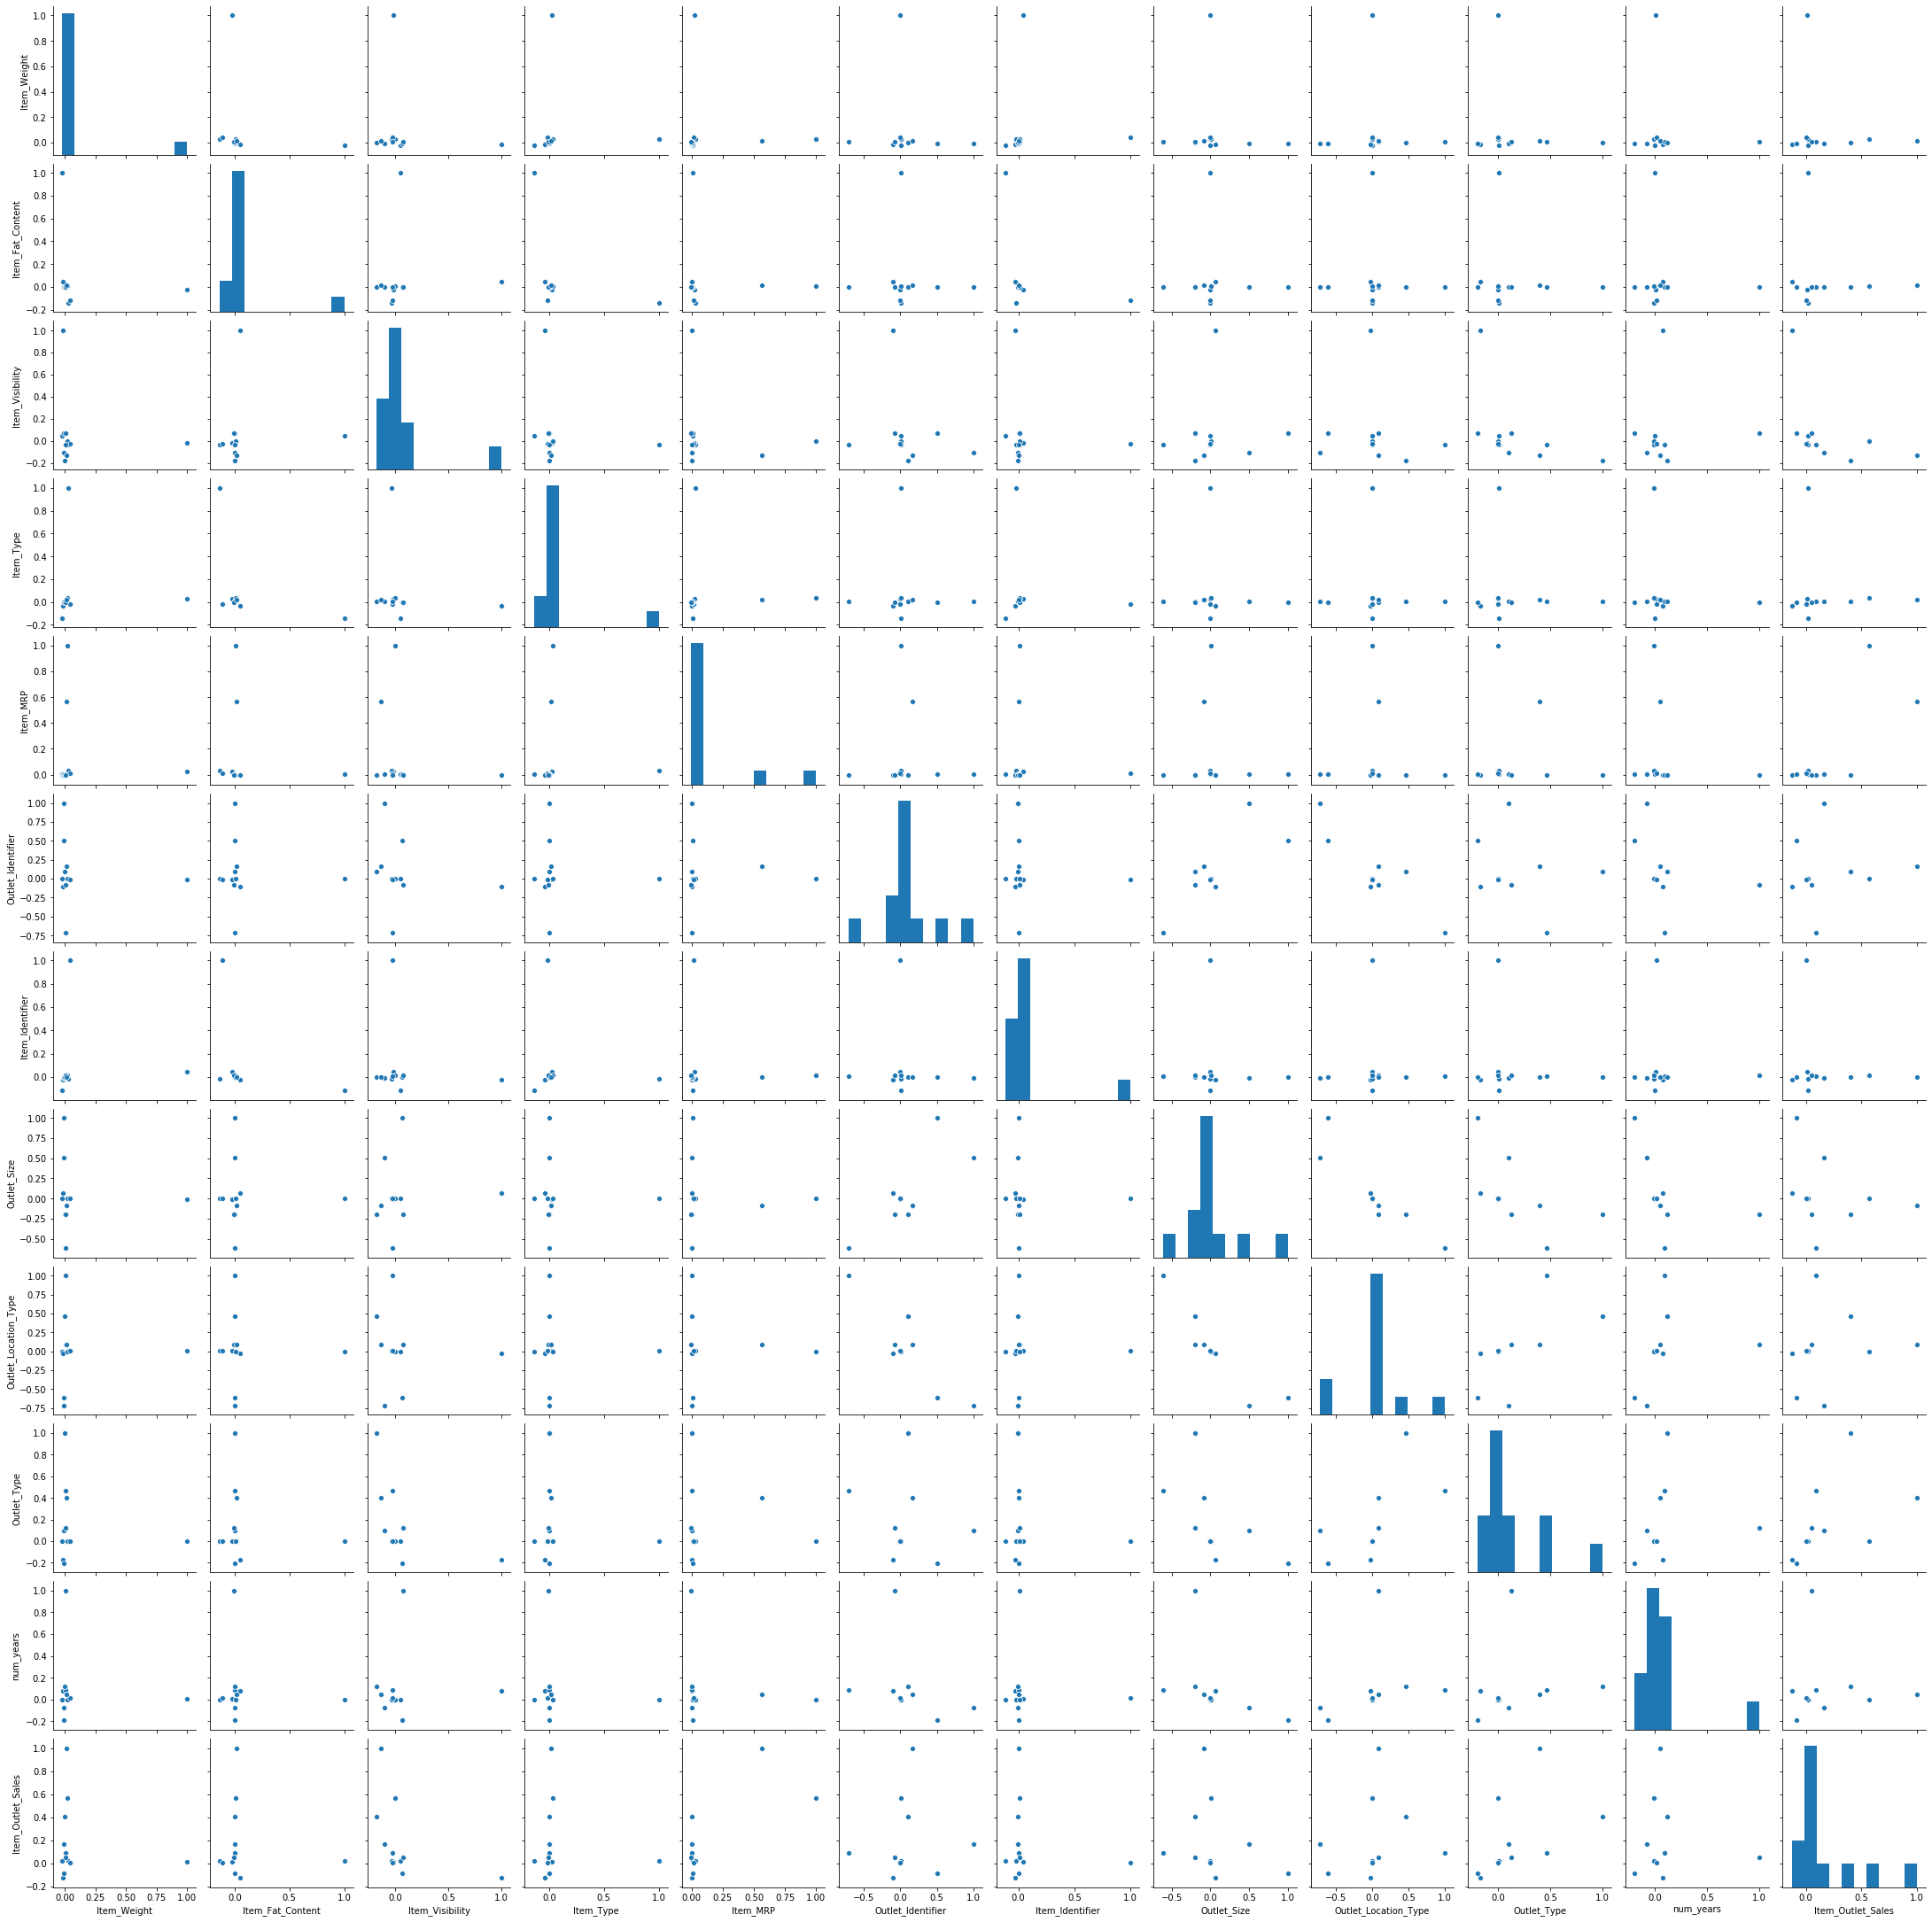

In [155]:
sns.pairplot(big_data_cor)

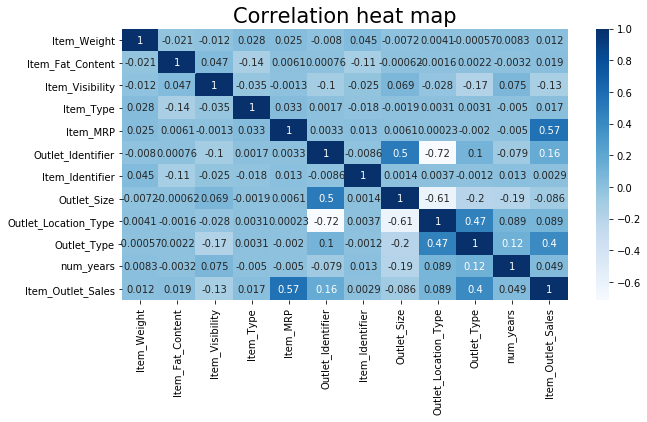

In [156]:
plt.figure(figsize=(10,5))
plt.title('Correlation heat map', fontsize = 21)

sns.heatmap(big_data_cor,cmap='Blues', annot=True)

observations:
    
    Item_MRP column has highest correlation with the Item_Outlet_Sales column i.e. 0.57 values

In [157]:
train_data_old = train_data


# Removing Outliers:

In [158]:
#Removing Outliers:

from scipy.stats import zscore
z=np.abs(zscore(train_data))
z

threshold = 3
print(np.where(z>threshold))


#creating new dataset without outliers and skewness
train_data = train_data[(z<3).all(axis=1)]


(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
        991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
       1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
       1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
       2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
       3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
       3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
       4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
       4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
       5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
       6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
       6886, 6903, 6993, 7005, 7016, 7076, 7088, 7

In [159]:
train_data.skew()

Item_Weight             0.089291
Item_Fat_Content        0.620973
Item_Visibility         0.794272
Item_Type               0.098295
Item_MRP                0.138990
Outlet_Identifier      -0.065135
Item_Identifier        -0.007837
Outlet_Size            -0.087933
Outlet_Location_Type   -0.202674
Outlet_Type             0.956727
num_years               0.423379
Item_Outlet_Sales       0.878267
dtype: float64

In [160]:
train_data_old.skew()

Item_Weight             0.090561
Item_Fat_Content        0.616705
Item_Visibility         1.167091
Item_Type               0.101655
Item_MRP                0.127202
Outlet_Identifier      -0.059861
Item_Identifier        -0.008877
Outlet_Size            -0.087072
Outlet_Location_Type   -0.209093
Outlet_Type             0.927438
num_years               0.396641
Item_Outlet_Sales       1.177531
dtype: float64

Observations:
    
    we can see skewness reduction in columns like Item_Visibility and Item_Outlet_Sales

In [161]:
print(((train_data_old.shape[0]-train_data.shape[0])/train_data_old.shape[0]*100))

2.170597207556025


Observations:
    
    By removing outliers we are loosing around 2.17 % of data, which is absolutely fine.

In [162]:
train_data_old

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,num_years,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,9,156,1,0,1,14,3735.1380
1,5.920,1,0.019278,14,48.2692,3,8,1,2,2,4,443.4228
2,17.500,0,0.016760,10,141.6180,9,662,1,0,1,14,2097.2700
3,19.200,1,0.000000,6,182.0950,0,1121,1,2,0,15,732.3800
4,8.930,0,0.000000,9,53.8614,1,1297,0,2,1,26,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,370,0,2,1,26,2778.3834
8519,8.380,1,0.046982,0,108.1570,7,897,1,1,1,11,549.2850
8520,10.600,0,0.035186,8,85.1224,6,1357,2,1,1,9,1193.1136
8521,7.210,1,0.145221,13,103.1332,3,681,1,2,2,4,1845.5976


In [163]:
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,num_years,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,9,156,1,0,1,14,3735.1380
1,5.920,1,0.019278,14,48.2692,3,8,1,2,2,4,443.4228
2,17.500,0,0.016760,10,141.6180,9,662,1,0,1,14,2097.2700
3,19.200,1,0.000000,6,182.0950,0,1121,1,2,0,15,732.3800
4,8.930,0,0.000000,9,53.8614,1,1297,0,2,1,26,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,370,0,2,1,26,2778.3834
8519,8.380,1,0.046982,0,108.1570,7,897,1,1,1,11,549.2850
8520,10.600,0,0.035186,8,85.1224,6,1357,2,1,1,9,1193.1136
8521,7.210,1,0.145221,13,103.1332,3,681,1,2,2,4,1845.5976


In [164]:
train_data['Item_Fat_Content'] = train_data_old['Item_Fat_Content']
train_data['Item_Type'] = train_data_old['Item_Type']
train_data['Outlet_Size'] = train_data_old['Outlet_Size']
train_data['Outlet_Location_Type'] = train_data_old['Outlet_Location_Type']
train_data['Outlet_Type'] = train_data_old['Outlet_Type']
train_data['Outlet_Identifier'] = train_data_old['Outlet_Identifier']
train_data['Item_Identifier'] = train_data_old['Item_Identifier']

In [165]:
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,num_years,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,9,156,1,0,1,14,3735.1380
1,5.920,1,0.019278,14,48.2692,3,8,1,2,2,4,443.4228
2,17.500,0,0.016760,10,141.6180,9,662,1,0,1,14,2097.2700
3,19.200,1,0.000000,6,182.0950,0,1121,1,2,0,15,732.3800
4,8.930,0,0.000000,9,53.8614,1,1297,0,2,1,26,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,370,0,2,1,26,2778.3834
8519,8.380,1,0.046982,0,108.1570,7,897,1,1,1,11,549.2850
8520,10.600,0,0.035186,8,85.1224,6,1357,2,1,1,9,1193.1136
8521,7.210,1,0.145221,13,103.1332,3,681,1,2,2,4,1845.5976


In [166]:
#Creating X,Y dataset to make model

In [167]:
x = train_data.iloc[:,0:11]
y = train_data.iloc[:,-1]

In [168]:
x.shape

(8338, 11)

In [169]:
y.shape

(8338,)

In [170]:
x.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Item_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'num_years'],
      dtype='object')

# Scaling the dataset

In [171]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x= sc.fit_transform(x)
columnslist = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Item_Identifier','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'num_years']
x= pd.DataFrame(x, columns = columnslist)
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,num_years
0,-0.837178,-0.736645,-1.011507,-0.766589,1.771831,1.496012,-1.386901,-0.278874,-1.370345,-0.259839,-0.120549
1,-1.632036,1.357506,-0.943320,1.610171,-1.482939,-0.615022,-1.715672,-0.278874,1.099060,1.022134,-1.322724
2,1.091176,-0.736645,-0.996464,0.659467,0.024597,1.496012,-0.262861,-0.278874,-1.370345,-0.259839,-0.120549
3,1.490957,1.357506,-1.350181,-0.291237,0.678281,-1.670540,0.756773,-0.278874,1.099060,-1.541811,-0.000332
4,-0.924189,-0.736645,-1.350181,0.421791,-1.392628,-1.318700,1.147744,-1.940955,1.099060,-0.259839,1.322060
...,...,...,...,...,...,...,...,...,...,...,...
8333,-1.409805,-0.736645,-0.151783,1.372495,1.201957,-1.318700,-0.911516,-1.940955,1.099060,-0.259839,1.322060
8334,-1.053529,1.357506,-0.358630,-1.717294,-0.515781,0.792334,0.259174,-0.278874,-0.135643,-0.259839,-0.481201
8335,-0.531463,-0.736645,-0.607585,0.184115,-0.887778,0.440495,1.281030,1.383207,-0.135643,-0.259839,-0.721636
8336,-1.328673,1.357506,1.714661,1.372495,-0.596913,-0.615022,-0.220653,-0.278874,1.099060,1.022134,-1.322724


In [172]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.10, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7504, 11)
(7504,)
(834, 11)
(834,)


# Linear Regression Model making

In [173]:
#Now we need to import few more libraries:

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [174]:
print('linearRegression Coeffient', lm.coef_)
print('linearRegression Intercept', lm.intercept_)
print('linearRegression score', lm.score(x_train, y_train))

linearRegression Coeffient [  -2.58854926   22.8245572   -49.07381245    0.96790162  909.65784776
  153.39436189   -0.9194733  -213.92149824 -210.09224265  641.82588524
  -22.57908792]
linearRegression Intercept 2130.9810448658113
linearRegression score 0.49800666501978497


Observation:
    
    Accuracy score of LinearRegression model is 49.80 %

In [175]:
y_pred = lm.predict(x_test)
y_pred

array([2426.93129332, 2037.50395581, 2689.50618301, 1406.20474372,
       3543.66924371,  477.4601507 , 3788.06918367, 2532.02709658,
       2931.01954748, 2312.65965328, 1564.67822439,  467.11039258,
       2670.57051042,  701.51899038, 1707.99532245,  414.58960976,
       1540.15714844,  751.39086644, 3389.26804544,  982.89551566,
       -318.16192943, 1754.44889511, 1744.30591497, 2300.80319713,
       1438.87498478, 3117.93854633, -277.62915135, 2339.94321269,
       2016.11431753, 3406.30877282, 1352.1998072 , 2324.02864775,
       2734.48209898, 2281.49371331,  876.51261004, 1091.76739468,
       2978.87727127, 2683.23517768, 1462.67452058,  568.98094526,
       2741.48666875, 2888.10257354, 2744.94877887, 3573.52232294,
       3258.01267898, 2170.45840505, 4340.41074957, 5208.63311066,
       3523.20575378, 2067.8825177 , 1648.45757932, 1585.10226814,
       3564.28281779, 1197.82404991, 1082.73436484, 3330.88181681,
       3615.33224842, 2298.7181643 ,  191.57105791,  467.01794

In [176]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# calculating errors::


print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred)))



ERRORS:
MEAN ABSOLUTE ERROR:  853.4240168075623
MEAN SQUARED ERROR:  1249075.3217809033
ROOT MEAN SQUARED ERROR:  1117.6203835743615


# checking overfitting of the model

In [177]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lm, x, y, cv=5).mean())

0.4970789373026016


# Regularizing the model using lasso and Ridge methods

In [178]:
#Regularization:: L1 and L2 Regularization

#L1 ---- Lasso Regression
#L2 ---- Ridge Regression

In [179]:
from sklearn.linear_model import Lasso, Ridge

In [180]:
ls = Lasso(alpha = 0.01)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)

0.49800666428949514

In [181]:
# try to minimize the coefficent variance

rd = Ridge(alpha= 0.01)

rd.fit(x_train, y_train)
rd.score(x_train, y_train)

0.49800666501793467

In [182]:
# elasticNet is a combination of both lasso and ridge algorithms

from sklearn.linear_model import ElasticNet
enr= ElasticNet(alpha= 0.01)

enr.fit(x_train, y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train, y_train))
enr.coef_

0.4979819654917652


array([  -2.41385941,   22.84626788,  -49.40730657,    1.01025823,
        904.98953944,  161.08050529,   -0.90726338, -210.39111905,
       -197.14230207,  632.36214047,  -21.32553944])

# Support Vector Regressor model

In [183]:
from sklearn.svm import SVR

kernellist = ['linear', 'poly', 'rbf']

for i in kernellist:
    sv = SVR(kernel = i)
    sv.fit(x_train, y_train)
    print('\nkernel : ' + i)
    print(sv.score(x_train, y_train))


kernel : linear
0.46858128918846254

kernel : poly
0.08502635899563549

kernel : rbf
0.06313285272164604


# Decision Tree Regressor methods:

In [184]:
from sklearn.tree import DecisionTreeRegressor


In [185]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
preddtr = dtr.predict(x_test)


In [186]:
print(dtr.score(x_train, y_train))

1.0


In [187]:
y_pred = dtr.predict(x_test)
y_pred

array([2441.4886, 2326.971 ,  644.4944, 2174.5028, 6088.0752,  645.1602,
       3813.7024, 1629.8784, 2960.1468, 2748.4224,  223.7088,  790.9704,
       2189.1504,  721.0614, 1135.189 ,  543.2928, 2313.655 ,  109.857 ,
       2749.754 ,  308.9312,  276.307 ,  945.436 ,  367.5216, 1844.266 ,
       2024.032 , 1593.9252,  186.424 , 2181.1608, 1857.582 , 2846.295 ,
        370.1848, 2150.534 , 1593.9252, 1743.0644,  437.4306, 1868.2348,
       2684.5056, 3266.4148, 3355.632 , 1024.6662, 2731.1116, 3174.5344,
       2267.049 , 2996.1   , 5141.3076, 3595.32  , 6242.5408, 7168.6686,
       3916.2356, 2098.6016, 3083.9856, 1540.6612, 3611.2992,  547.2876,
        628.5152, 2796.36  , 3635.268 , 3795.06  ,  197.0768,  115.8492,
       2051.9956, 2217.114 , 2348.9424, 6231.888 , 4544.085 , 1018.674 ,
        973.3996, 2303.668 , 2077.296 , 3643.2576, 3998.7948, 3399.5748,
       1604.578 , 1431.47  ,  671.1264, 1335.5948, 3583.3356,  279.636 ,
       3249.104 , 3415.554 , 1151.1682, 6114.7072, 

In [188]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred)))


ERRORS:
MEAN ABSOLUTE ERROR:  999.6268510791367
MEAN SQUARED ERROR:  1983181.4508720152
ROOT MEAN SQUARED ERROR:  1408.2547535414235


# checking overfitting of the model

In [189]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtr, x, y, cv=5).mean())

0.11847037828582056


# Random Forest Regressor method

In [190]:
from sklearn.ensemble import RandomForestRegressor

In [191]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)


In [192]:
print(rf.score(x_train, y_train))

0.935792201971475


In [193]:
pred

array([2054.55893 , 2188.937344, 2272.00921 , 1795.789102, 3817.783754,
        675.174464, 4516.993598, 3060.64931 , 2447.567354, 2849.963558,
        671.918702,  722.100048, 2834.417128,  573.240484, 1429.126384,
        589.046576, 1195.87667 ,  274.269652, 3190.11412 ,  503.404722,
        184.7595  ,  570.377544,  417.39002 , 2812.811918, 1752.958188,
       2569.15575 ,  128.93217 , 1838.034112, 1490.553092, 2667.454462,
        408.30185 , 2044.358874, 2701.110652, 2595.727828,  502.452628,
       1532.345358, 3727.254928, 2377.944648, 2018.07309 ,  666.871938,
       3861.999532, 2036.875282, 2343.043412, 3911.182178, 3740.417794,
       2887.115198, 4999.39233 , 5379.544156, 3835.320926, 1972.89856 ,
       2498.600924, 1824.105576, 3762.888544, 1140.342292,  464.688452,
       3937.281538, 3433.024592, 2556.212598,  243.503034,  259.49555 ,
       2404.70315 , 2553.04339 , 2537.99631 , 3989.247228, 4192.522626,
       2763.549376, 1560.109218, 2593.15784 , 2738.695062, 4164.

In [194]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))


ERRORS:
MEAN ABSOLUTE ERROR:  748.6016022925661
MEAN SQUARED ERROR:  1104065.6914538972
ROOT MEAN SQUARED ERROR:  1050.7453028464593


# checking overfitting of the model

In [195]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rf, x, y, cv=5).mean())

0.537081805994952


# Ada Boost Regressor model

In [196]:
from sklearn.ensemble import AdaBoostRegressor
adr = AdaBoostRegressor(n_estimators=100)
adr.fit(x_train, y_train)
pred=adr.predict(x_test)
print(adr.score(x_train, y_train))

0.5584487808086556


In [197]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  763.918671541088
MEAN SQUARED ERROR:  1055875.2007650435
ROOT MEAN SQUARED ERROR:  1027.5578819536365


# checking overfitting of the model

In [198]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(adr, x, y, cv=5).mean())

0.5520479164470515


# OBSERVATIONS:

By checking the overfitting of the models with their cv score, we can find that Linear Regression model is best fitted.

In [199]:
lm.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

# Hyper Tuning Linear regression model

In [200]:
from sklearn.model_selection import GridSearchCV


In [201]:
lm_t = LinearRegression

copy_X = ['True', 'False']
fit_intercept = ['True', 'False']
normalize = ['True', 'False']
positive = ['True', 'False']

parameters = {'copy_X' :  ['True', 'False'],
              'fit_intercept' : ['True', 'False'],
              'normalize' : ['True', 'False'],
              'positive' : ['True', 'False']
             }

In [202]:
gs_lm = GridSearchCV(LinearRegression(), parameters, cv = 5)

In [203]:
gs_lm.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'normalize': ['True', 'False'],
                         'positive': ['True', 'False']})

In [204]:
gs_lm.best_params_

{'copy_X': 'True',
 'fit_intercept': 'True',
 'normalize': 'True',
 'positive': 'True'}

In [205]:
#Checking parameters for final model

lm_final = LinearRegression(copy_X=True, fit_intercept=True, normalize=True, positive=True)
lm_final.fit(x_train, y_train)

LinearRegression(normalize=True, positive=True)

In [206]:
print('linearRegression Coeffient', lm_final.coef_)
print('linearRegression Intercept', lm_final.intercept_)


linearRegression Coeffient [  0.          21.5852889    0.           2.40045199 908.68751313
 207.22834853   0.           0.           0.         582.02032961
  11.59080191]
linearRegression Intercept 2131.0477988205043


In [207]:

print('\nlinearRegression score', lm_final.score(x_train, y_train))


linearRegression score 0.4852700749794171


Accuracy is less than the earlier linear regresion model, hence choosing the earlier model

# Final Model:

In [208]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print('linearRegression Coeffient', lm.coef_)
print('linearRegression Intercept', lm.intercept_)
print('linearRegression score', lm.score(x_train, y_train))


linearRegression Coeffient [  -2.58854926   22.8245572   -49.07381245    0.96790162  909.65784776
  153.39436189   -0.9194733  -213.92149824 -210.09224265  641.82588524
  -22.57908792]
linearRegression Intercept 2130.9810448658113
linearRegression score 0.49800666501978497


In [209]:
y_pred = lm.predict(x_test)
y_pred


array([2426.93129332, 2037.50395581, 2689.50618301, 1406.20474372,
       3543.66924371,  477.4601507 , 3788.06918367, 2532.02709658,
       2931.01954748, 2312.65965328, 1564.67822439,  467.11039258,
       2670.57051042,  701.51899038, 1707.99532245,  414.58960976,
       1540.15714844,  751.39086644, 3389.26804544,  982.89551566,
       -318.16192943, 1754.44889511, 1744.30591497, 2300.80319713,
       1438.87498478, 3117.93854633, -277.62915135, 2339.94321269,
       2016.11431753, 3406.30877282, 1352.1998072 , 2324.02864775,
       2734.48209898, 2281.49371331,  876.51261004, 1091.76739468,
       2978.87727127, 2683.23517768, 1462.67452058,  568.98094526,
       2741.48666875, 2888.10257354, 2744.94877887, 3573.52232294,
       3258.01267898, 2170.45840505, 4340.41074957, 5208.63311066,
       3523.20575378, 2067.8825177 , 1648.45757932, 1585.10226814,
       3564.28281779, 1197.82404991, 1082.73436484, 3330.88181681,
       3615.33224842, 2298.7181643 ,  191.57105791,  467.01794

In [210]:

print("\nERRORS:")
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred)))




ERRORS:
MEAN ABSOLUTE ERROR:  853.4240168075623
MEAN SQUARED ERROR:  1249075.3217809033
ROOT MEAN SQUARED ERROR:  1117.6203835743615


# Predicting Final Test data:

In [211]:
y_pred = lm.predict(test_data)

In [212]:
y_pred

array([28223.95535422, 16622.90125456, 44941.92960823, ...,
       24159.19498588, 36824.08926194, 14676.17967466])

# Saving the model

In [213]:
import joblib
joblib.dump(lm, 'Vaibhav_big_data_sales_Project_Model.pkl')

['Vaibhav_big_data_sales_Project_Model.pkl']

Conclusion:
    
    Our Model is having accuracy of 49.80 % which is not good but better.

# Thank You